## MASTERS 2025 script

### Scrape the recent data

In [43]:
# List of URLs to process.
data_urls = [
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2025&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2024&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2023&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2022&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2021&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2020&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2019&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2018&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2017&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=liv&year=2025&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=liv&year=2024&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=liv&year=2023&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=liv&year=2022&sg=true"
]

In [45]:
import re
import pandas as pd
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs

def clean_numeric(value):
    # Remove any content inside parentheses and any leading plus sign.
    value = re.sub(r'\(.*?\)', '', value)
    return float(value.replace('+', '').strip())

def extract_table_from_url(url):
    # Parse URL query parameters for tour and year.
    parsed_url = urlparse(url)
    qs = parse_qs(parsed_url.query)
    tour_val = qs.get('tour', [''])[0]
    year_val = qs.get('year', [''])[0]
    
    # Set up Firefox in headless mode.
    options = Options()
    options.headless = True
    driver = webdriver.Firefox(options=options)
    driver.get(url)
    
    # Wait until at least one row is loaded.
    try:
        WebDriverWait(driver, 30).until(
            EC.presence_of_element_located((By.CLASS_NAME, "lists-datarow"))
        )
    except Exception as e:
        print("Timed out waiting for table rows on URL:", url, e)
    html = driver.page_source
    driver.quit()
    
    soup = BeautifulSoup(html, 'html.parser')
    
    # Extract headers from the header div.
    header_div = soup.find('div', class_='head')
    headers = []
    for h in header_div.find_all('div', class_='datahead'):
        main_text = h.find(text=True, recursive=False)
        if main_text:
            headers.append(main_text.strip())
        else:
            headers.append(h.get_text(strip=True))
    # Drop the "R" header (rounds) which is at index 1.
    if len(headers) == 9:
        headers.pop(1)
    # Final header list should be: ['Player', 'Putt', 'Arg', 'App', 'OTT', 'BS', 'T2G', 'Total']
    
    # Extract rows – each row is in a div with class "lists-datarow".
    rows = []
    for row_div in soup.find_all('div', class_='lists-datarow'):
        cols = [col.get_text(strip=True) for col in row_div.find_all('div', class_='data')]
        # If there is a redundant short name column, remove it.
        if len(cols) == 10:
            cols.pop(1)
        # Drop the R (Rounds) column which is now at index 1.
        if len(cols) == 9:
            cols.pop(1)
        rows.append(cols)
    
    # Clean numeric fields: for all columns except "Player".
    for i, row in enumerate(rows):
        new_row = []
        for j, cell in enumerate(row):
            if j == 0:  # Keep player name as is.
                new_row.append(cell)
            else:
                try:
                    new_row.append(clean_numeric(cell))
                except Exception as e:
                    new_row.append(None)
        rows[i] = new_row
    
    # Build DataFrame and add tour/year.
    df = pd.DataFrame(rows, columns=headers)
    df['tour'] = tour_val
    df['year'] = int(year_val) if year_val.isdigit() else year_val
    return df



# Loop over URLs and union the results.
dfs = []
for url in data_urls:
    print("Processing URL:", url)
    try:
        df_url = extract_table_from_url(url)
        dfs.append(df_url)
    except Exception as e:
        print("Error processing", url, e)

final_df = pd.concat(dfs, ignore_index=True)
print(final_df.head())


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2025&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2024&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2023&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2022&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2021&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2020&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2019&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2018&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2017&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=liv&year=2025&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=liv&year=2024&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=liv&year=2023&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=liv&year=2022&sg=true
              Player  Putt   Arg   App   OTT    BS   T2G  Total tour  year
0    Collin Morikawa  0.33  0.37  1.48  0.75  2.23  2.60   2.93  pga  2025
1       Rory McIlroy  0.71  0.35  0.83  1.04  1.87  2.22   2.93  pga  2025
2  Scottie Scheffler  0.42  0.27  1.08  0.79  1.86  2.13   2.55  pga  2025
3    Tommy Fleetwood  0.45  0.13  1.01  0.59  1.60  1.73   2.18  pga  2025
4     Russell Henley  0.63  0.43  0.77  0.21  0.99  1.42   2.04  pga  2025


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)


In [234]:
final_df

,Player,Putt,Arg,App,OTT,BS,T2G,Total,tour,year
0,Collin Morikawa,0.33,0.37,1.48,0.75,2.23,2.60,2.93,pga,2025
1,Rory Mcilroy,0.71,0.35,0.83,1.04,1.87,2.22,2.93,pga,2025
2,Scottie Scheffler,0.42,0.27,1.08,0.79,1.86,2.13,2.55,pga,2025
3,Tommy Fleetwood,0.45,0.13,1.01,0.59,1.60,1.73,2.18,pga,2025
4,Russell Henley,0.63,0.43,0.77,0.21,0.99,1.42,2.04,pga,2025
...,...,...,...,...,...,...,...,...,...,...
2135,Hudson Swafford,NaN,NaN,NaN,NaN,NaN,NaN,-1.81,liv,2022
2136,Hideto Tanihara,NaN,NaN,NaN,NaN,NaN,NaN,-1.96,liv,2022
2137,Shaun Norris,NaN,NaN,NaN,NaN,NaN,NaN,-2.05,liv,2022
2138,Jediah Morgan,NaN,NaN,NaN,NaN,NaN,NaN,-2.15,liv,2022


## Get Augusta only data

In [236]:
import re
import time
import numpy as np
import pandas as pd
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from bs4 import BeautifulSoup

def clean_numeric(text):
    """
    Remove any content inside parentheses and return the remaining text.
    e.g. "73 (+1)" becomes "73".
    """
    cleaned = re.sub(r'\(.*?\)', '', text)
    return cleaned.strip()

def clean_player_name(raw_name):
    """
    Clean the raw player name.
    If the raw name contains a comma (assumed to be "LASTNAME, FIRSTNAME"),
    split it and return "FirstName LastName" with proper title casing.
    Otherwise, just return the title-cased raw name.
    """
    if "," in raw_name:
        parts = [p.strip() for p in raw_name.split(",")]
        if len(parts) == 2:
            return f"{parts[1].title()} {parts[0].title()}"
    return raw_name.strip().title()

def extract_masters_results(url):
    """
    Use Selenium to load the page and BeautifulSoup to extract the table rows.
    Returns a DataFrame with columns: Player, R1, R2, R3, and R4.
    """
    options = Options()
    options.add_argument('-headless')
    driver = webdriver.Firefox(options=options)
    driver.get(url)
    
    # Wait for the table to load; adjust time as needed.
    time.sleep(5)
    
    html = driver.page_source
    driver.quit()
    
    soup = BeautifulSoup(html, 'html.parser')
    
    # Locate the container holding the table rows (adjust the selector if needed)
    table_div = soup.find("div", class_="table-div")
    if not table_div:
        print("Table container not found for", url)
        return pd.DataFrame()
    
    # Each row is a div with class "datarow"
    rows = table_div.find_all("div", class_="datarow")
    data = []
    for row in rows:
        # Extract the player name from the "player-col" div.
        player_div = row.find("div", class_=lambda x: x and "player-col" in x)
        if player_div:
            a_tag = player_div.find("a")
            if a_tag:
                # Use all stripped strings from the <a> tag
                raw_player = " ".join(a_tag.stripped_strings)
            else:
                raw_player = player_div.get_text(strip=True)
            player = clean_player_name(raw_player)
        else:
            player = ""
        
        # Extract round scores; if a round is missing, the text will be empty.
        r1_div = row.find("div", class_=lambda x: x and "r1-col" in x)
        r1 = clean_numeric(r1_div.get_text()) if r1_div else ""
        
        r2_div = row.find("div", class_=lambda x: x and "r2-col" in x)
        r2 = clean_numeric(r2_div.get_text()) if r2_div else ""
        
        r3_div = row.find("div", class_=lambda x: x and "r3-col" in x)
        r3 = clean_numeric(r3_div.get_text()) if r3_div else ""
        
        r4_div = row.find("div", class_=lambda x: x and "r4-col" in x)
        r4 = clean_numeric(r4_div.get_text()) if r4_div else ""
        
        data.append({
            "Player": player,
            "R1": r1,
            "R2": r2,
            "R3": r3,
            "R4": r4
        })
    
    df = pd.DataFrame(data)
    return df

def compute_avg_score(row):
    """
    Given a row with columns R1, R2, R3, and R4, convert them to floats (if possible)
    and compute the average of only the valid (non-empty) rounds.
    """
    rounds = []
    for col in ['R1', 'R2', 'R3', 'R4']:
        try:
            val = float(row[col])
            rounds.append(val)
        except:
            continue
    if len(rounds) > 0:
        return sum(rounds) / len(rounds)
    else:
        return np.nan

# List of URLs to process (one for each year)
data_urls = [
    "https://datagolf.com/past-results/majors/14/2024",
    "https://datagolf.com/past-results/majors/14/2023",
    "https://datagolf.com/past-results/majors/14/2022",
    "https://datagolf.com/past-results/majors/14/2021",
    "https://datagolf.com/past-results/majors/14/2020",
    "https://datagolf.com/past-results/majors/14/2019",
    "https://datagolf.com/past-results/majors/14/2018",
]

# List to store each year's DataFrame (with only Player and the new average column)
dfs = []

for url in data_urls:
    print("Processing URL:", url)
    df = extract_masters_results(url)
    if df.empty:
        continue
    # Extract year from URL (assumes the year is the last part of the URL)
    year = url.rstrip("/").split("/")[-1]
    
    # Compute the average score for available rounds and create a new column
    df[f"{year}_masters_avg_score"] = df.apply(compute_avg_score, axis=1)
    
    # Keep only the Player and the new average score column
    df_small = df[["Player", f"{year}_masters_avg_score"]]
    dfs.append(df_small)

# Merge the DataFrames from different years on the "Player" column (outer join)
if dfs:
    merged_df = dfs[0]
    for df in dfs[1:]:
        merged_df = pd.merge(merged_df, df, on="Player", how="outer")
    print("Merged DataFrame:")
    print(merged_df.head())
else:
    print("No data frames extracted.")


Processing URL: https://datagolf.com/past-results/majors/14/2024
Processing URL: https://datagolf.com/past-results/majors/14/2023
Processing URL: https://datagolf.com/past-results/majors/14/2022
Processing URL: https://datagolf.com/past-results/majors/14/2021
Processing URL: https://datagolf.com/past-results/majors/14/2020
Processing URL: https://datagolf.com/past-results/majors/14/2019
Processing URL: https://datagolf.com/past-results/majors/14/2018
Merged DataFrame:
              Player  2024_masters_avg_score  2023_masters_avg_score  \
0  Scheffler Scottie                   69.25                   71.00   
1       Aberg Ludvig                   70.25                     NaN   
2    Fleetwood Tommy                   71.00                   72.75   
3           Homa Max                   71.00                   73.50   
4    Morikawa Collin                   71.00                   71.00   

   2022_masters_avg_score  2021_masters_avg_score  2020_masters_avg_score  \
0                

In [337]:
# check what the data looks like
merged_df.describe(include='all')

,Player,2024_masters_avg_score,2023_masters_avg_score,2022_masters_avg_score,2021_masters_avg_score,2020_masters_avg_score,2019_masters_avg_score,2018_masters_avg_score
count,225,89.000000,86.000000,90.000000,88.000000,92.000000,87.000000,87.000000
unique,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Scottie Scheffler,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,74.373596,73.470930,74.511111,73.650568,72.233696,72.324713,73.701149
std,NaN,2.141687,2.248012,2.451184,2.415390,2.292727,2.358839,3.027932
min,NaN,69.250000,69.000000,69.500000,69.500000,67.000000,68.750000,68.250000
25%,NaN,73.000000,71.562500,72.750000,72.000000,70.750000,70.750000,71.500000
50%,NaN,74.250000,73.500000,74.375000,73.000000,72.250000,71.750000,73.000000
75%,NaN,75.500000,75.000000,75.937500,74.812500,73.500000,74.000000,76.000000


In [53]:
## merge the two datasets

In [242]:
import pandas as pd

# ===== STEP 1: Standardize the Player names ===== #

# For final_df: convert names to lowercase, remove extra spaces, then title-case.
final_df['Player'] = (
    final_df['Player']
    .str.lower()
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
    .str.title()
)

# For merged_df: convert names to lowercase, remove extra spaces, then reverse if two words.
merged_df['Player'] = (
    merged_df['Player']
    .str.lower()
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

# Define a helper function to reverse names that are exactly two words.
def reverse_if_two(name):
    parts = name.split(' ')
    if len(parts) == 2:
        return parts[1] + " " + parts[0]
    return name

merged_df['Player'] = merged_df['Player'].apply(reverse_if_two)

# Finally, convert merged_df names to title-case.
merged_df['Player'] = merged_df['Player'].str.title()

# ===== STEP 2: Reshape merged_df (melt it) ===== #
# The master score columns are named like "2024_masters_avg_score", etc.
# We melt merged_df so that each such column becomes a row.
melted = merged_df.melt(id_vars=['Player'],
                        var_name='year_master',
                        value_name='masters_avg_score')

# Extract the 4-digit year from the "year_master" column
melted['year'] = melted['year_master'].str.extract(r'(\d{4})').astype(int)

# Drop the now unneeded "year_master" column
melted.drop(columns='year_master', inplace=True)

# ===== STEP 3: Merge final_df with the melted masters data ===== #
# Do a left join on both "Player" and "year". This ensures every row in final_df remains.
final_merged = pd.merge(final_df, melted, on=['Player', 'year'], how='left')

print(final_merged.head())


              Player  Putt   Arg   App   OTT    BS   T2G  Total tour  year  \
0    Collin Morikawa  0.33  0.37  1.48  0.75  2.23  2.60   2.93  pga  2025   
1       Rory Mcilroy  0.71  0.35  0.83  1.04  1.87  2.22   2.93  pga  2025   
2  Scottie Scheffler  0.42  0.27  1.08  0.79  1.86  2.13   2.55  pga  2025   
3    Tommy Fleetwood  0.45  0.13  1.01  0.59  1.60  1.73   2.18  pga  2025   
4     Russell Henley  0.63  0.43  0.77  0.21  0.99  1.42   2.04  pga  2025   

   masters_avg_score  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  


In [341]:
final_merged.describe(include='all')

,Player,Putt,Arg,App,OTT,BS,T2G,Total,tour,year,masters_avg_score,player_lower
count,2140,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2140.000000,2140,2140.000000,491.000000,2140
unique,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,518
top,Branden Grace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pga,NaN,NaN,branden grace
freq,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942,NaN,NaN,10
mean,NaN,0.005958,0.011989,0.021126,0.007513,0.028752,0.040624,0.046271,NaN,2021.177103,72.948574,NaN
std,NaN,0.389828,0.260664,0.474946,0.441701,0.788072,0.873494,0.981792,NaN,2.584873,2.261203,NaN
min,NaN,-2.270000,-1.210000,-2.990000,-2.080000,-5.070000,-5.010000,-4.400000,NaN,2017.000000,67.000000,NaN
25%,NaN,-0.235000,-0.150000,-0.270000,-0.240000,-0.450000,-0.490000,-0.560000,NaN,2019.000000,71.500000,NaN
50%,NaN,0.010000,0.020000,0.040000,0.020000,0.040000,0.040000,0.040000,NaN,2021.000000,72.750000,NaN
75%,NaN,0.280000,0.190000,0.325000,0.280000,0.520000,0.610000,0.672500,NaN,2023.000000,74.375000,NaN


In [343]:
final_merged[final_merged['Player'] == "Collin Morikawa"]

,Player,Putt,Arg,App,OTT,BS,T2G,Total,tour,year,masters_avg_score,player_lower
0,Collin Morikawa,0.33,0.37,1.48,0.75,2.23,2.60,2.93,pga,2025,NaN,collin morikawa
198,Collin Morikawa,0.24,0.41,0.59,0.58,1.17,1.59,1.83,pga,2024,71.00,collin morikawa
408,Collin Morikawa,0.00,0.15,1.16,0.58,1.74,1.89,1.89,pga,2023,71.00,collin morikawa
638,Collin Morikawa,0.05,-0.07,1.00,0.50,1.50,1.43,1.49,pga,2022,71.00,collin morikawa
856,Collin Morikawa,-0.31,0.13,1.31,0.53,1.84,1.97,1.74,pga,2021,71.75,collin morikawa
1082,Collin Morikawa,0.05,0.04,1.04,0.61,1.65,1.69,1.65,pga,2020,72.00,collin morikawa
1294,Collin Morikawa,0.01,-0.02,0.92,0.39,1.32,1.30,1.31,pga,2019,NaN,collin morikawa


In [345]:
masters_field[masters_field['Player'] == "Collin Morikawa"]

,Player,Putt,Arg,App,OTT,BS,T2G,Total,tour,year,masters_avg_score
0,Collin Morikawa,0.33,0.37,1.48,0.75,2.23,2.60,2.93,pga,2025,NaN
198,Collin Morikawa,0.24,0.41,0.59,0.58,1.17,1.59,1.83,pga,2024,71.00
408,Collin Morikawa,0.00,0.15,1.16,0.58,1.74,1.89,1.89,pga,2023,71.00
638,Collin Morikawa,0.05,-0.07,1.00,0.50,1.50,1.43,1.49,pga,2022,71.00
856,Collin Morikawa,-0.31,0.13,1.31,0.53,1.84,1.97,1.74,pga,2021,71.75
1082,Collin Morikawa,0.05,0.04,1.04,0.61,1.65,1.69,1.65,pga,2020,72.00
1294,Collin Morikawa,0.01,-0.02,0.92,0.39,1.32,1.30,1.31,pga,2019,NaN


# Get odds (as of 2 April from sky bet) 

### Calculating Implied Probabilities from Betting Odds

If a player is **4/1 to win**, and there’s a **1/5 each-way option** paying for a **top 6 finish**, we can calculate the **implied probabilities** based on those odds.

#### 1. Win (4/1)

Fractional odds of 4/1 mean you get £4 profit for every £1 staked.  
To convert to implied probability:

\[
\text{Implied Probability} = \frac{1}{(4 + 1)} = \frac{1}{5} = 20\%
\]

#### 2. Top 6 (Each-Way at 1/5 Odds)

Each-way betting splits your stake into two bets:  
- One for the player to **win** (already covered)  
- One for the player to **place** (top 6), paid at **1/5 of the win odds**

So the place odds are:

\[
\frac{4}{1} \times \frac{1}{5} = \frac{4}{5}
\]

Convert those odds to implied probability:

\[
\text{Implied Probability (Top 6)} = \frac{1}{(4/5 + 1)} = \frac{1}{9/5} = \frac{5}{9} \approx 55.6\%
\]

---

**Final Answers:**
- **Win:** 20% implied probability  
- **Top 6 (Place):** ~55.6% implied probability


In [254]:
import pandas as pd

# Raw data (same alternating format as before)
raw_data = [
    "Scottie Scheffler", "4/1", "Rory McIlroy", "6/1", "Collin Morikawa", "12/1", "Jon Rahm", "16/1",
    "Ludvig Aberg", "16/1", "Bryson Dechambeau", "18/1", "Justin Thomas", "20/1", "Xander Schauffele", "20/1",
    "Hideki Matsuyama", "25/1", "Joaquin Niemann", "25/1", "Brooks Koepka", "28/1", "Patrick Cantlay", "28/1",
    "Tommy Fleetwood", "28/1", "Jordan Spieth", "30/1", "Viktor Hovland", "30/1", "Shane Lowry", "33/1",
    "Minwoo Lee", "35/1", "Tyrrell Hatton", "35/1", "Russell Henley", "40/1", "Will Zalatoris", "40/1",
    "Akshay Bhatia", "50/1", "Cameron Smith", "50/1", "Robert MacIntyre", "50/1", "Corey Conners", "55/1",
    "Sepp Straka", "60/1", "Tony Finau", "60/1", "Jason Day", "66/1", "Wyndham Clark", "66/1",
    "Dustin Johnson", "80/1", "Justin Rose", "80/1", "Patrick Reed", "80/1", "Sahith Theegala", "80/1",
    "Sergio Garcia", "80/1", "Tom Kim", "80/1", "Matt Fitzpatrick", "100/1", "Sam Burns", "100/1",
    "Sungjae Im", "100/1", "Keegan Bradley", "110/1", "Aaron Rai", "125/1", "Adam Scott", "125/1",
    "Billy Horschel", "125/1", "Cameron Young", "125/1", "Daniel Berger", "125/1", "Davis Thompson", "125/1",
    "Maverick McNealy", "125/1", "Phil Mickelson", "125/1", "Thomas Detry", "125/1", "Brian Harman", "150/1",
    "Byeong Hun An", "150/1", "J.J. Spaun", "150/1", "Nicolai Hojgaard", "150/1", "Rasmus Hojgaard", "150/1",
    "Taylor Pendrith", "150/1", "Denny McCarthy", "175/1", "Lucas Glover", "175/1", "Max Homa", "175/1",
    "Michael Kim", "175/1", "Cam Davis", "200/1", "Christiaan Bezuidenhout", "200/1", "Harris English", "200/1",
    "Laurie Canter", "200/1", "Max Greyserman", "200/1", "Nick Dunlap", "250/1", "Nick Taylor", "250/1",
    "Nico Echavarria", "250/1", "Stephan Jaeger", "250/1", "Tom Hoge", "250/1", "Austin Eckroat", "300/1",
    "Chris Kirk", "300/1", "J.T. Poston", "300/1", "Joe Highsmith", "300/1", "Bubba Watson", "400/1",
    "Charl Schwartzel", "400/1", "Danny Willett", "400/1", "Davis Riley", "400/1", "Jhonattan Vegas", "400/1",
    "Kevin Yu", "400/1", "Matt McCarty", "400/1", "Adam Schenk", "500/1", "Brian Campbell", "500/1",
    "Matthieu Pavon", "500/1", "Patton Kizzire", "500/1", "Thriston Lawrence", "500/1", "Jose Luis Ballester", "600/1",
    "Justin Hastings", "750/1", "Bernhard Langer", "1000/1", "Evan Beck", "1000/1", "Zach Johnson", "1000/1",
    "Fred Couples", "1500/1", "Angel Cabrera", "2000/1", "Hiroshi Tai", "2000/1", "Rafael Campos", "2000/1",
    "Noah Kent", "2500/1", "Vijay Singh", "2500/1", "Mike Weir", "5000/1", "Jose Maria Olazabal", "7500/1"
]

# Separate into names and odds
players = raw_data[::2]
odds_values = raw_data[1::2]

# Create dataframe
odds = pd.DataFrame({
    "Player": players,
    "Odds": odds_values
})

# Function to convert fractional odds to implied probability
def fractional_to_percent(fraction):
    num, denom = map(int, fraction.split('/'))
    return round(100 / (num / denom + 1), 2)

# Add win and EW top 6 probabilities
odds["Win Probability (%)"] = odds["Odds"].apply(fractional_to_percent)

def ew_fraction_to_percent(fraction):
    num, denom = map(int, fraction.split('/'))
    ew_fraction = f"{num}/{denom * 5}"  # each-way is 1/5 odds
    num, denom = map(int, ew_fraction.split('/'))
    return round(100 / (num / denom + 1), 2)

odds["EW Top 6 Probability (%)"] = odds["Odds"].apply(ew_fraction_to_percent)


In [256]:
odds

,Player,Odds,Win Probability (%),EW Top 6 Probability (%)
0,Scottie Scheffler,4/1,20.00,55.56
1,Rory McIlroy,6/1,14.29,45.45
2,Collin Morikawa,12/1,7.69,29.41
3,Jon Rahm,16/1,5.88,23.81
4,Ludvig Aberg,16/1,5.88,23.81
...,...,...,...,...
91,Rafael Campos,2000/1,0.05,0.25
92,Noah Kent,2500/1,0.04,0.20
93,Vijay Singh,2500/1,0.04,0.20
94,Mike Weir,5000/1,0.02,0.10


# create a 'masters' flag

In [262]:
# Create lowercase versions of player names for matching
final_merged["player_lower"] = final_merged["Player"].str.lower()
odds["player_lower"] = odds["Player"].str.lower()

# Merge using the lowercase version
complete_data = final_merged.merge(
    odds.drop(columns=["Player"]),  # Drop the original 'Player' from odds
    how="left",
    on="player_lower"
)

# Optional: Drop the temporary lowercase join column
complete_data = complete_data.drop(columns=["player_lower"])

# Add flag for whether the player matched to the odds table
complete_data["in_2025_masters"] = complete_data["Odds"].notnull()


In [357]:
complete_data

,Player,Putt,Arg,App,OTT,BS,T2G,Total,tour,year,masters_avg_score,Odds,Win Probability (%),EW Top 6 Probability (%),in_2025_masters
0,Collin Morikawa,0.33,0.37,1.48,0.75,2.23,2.60,2.93,pga,2025,NaN,12/1,7.69,29.41,True
1,Rory Mcilroy,0.71,0.35,0.83,1.04,1.87,2.22,2.93,pga,2025,NaN,6/1,14.29,45.45,True
2,Scottie Scheffler,0.42,0.27,1.08,0.79,1.86,2.13,2.55,pga,2025,NaN,4/1,20.00,55.56,True
3,Tommy Fleetwood,0.45,0.13,1.01,0.59,1.60,1.73,2.18,pga,2025,NaN,28/1,3.45,15.15,True
4,Russell Henley,0.63,0.43,0.77,0.21,0.99,1.42,2.04,pga,2025,NaN,40/1,2.44,11.11,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,Hudson Swafford,NaN,NaN,NaN,NaN,NaN,NaN,-1.81,liv,2022,73.25,NaN,NaN,NaN,False
2136,Hideto Tanihara,NaN,NaN,NaN,NaN,NaN,NaN,-1.96,liv,2022,NaN,NaN,NaN,NaN,False
2137,Shaun Norris,NaN,NaN,NaN,NaN,NaN,NaN,-2.05,liv,2022,NaN,NaN,NaN,NaN,False
2138,Jediah Morgan,NaN,NaN,NaN,NaN,NaN,NaN,-2.15,liv,2022,NaN,NaN,NaN,NaN,False


In [361]:
complete_data[complete_data['Player'] == "Corey Conners"]

,Player,Putt,Arg,App,OTT,BS,T2G,Total,tour,year,masters_avg_score,Odds,Win Probability (%),EW Top 6 Probability (%),in_2025_masters
18,Corey Conners,0.29,0.10,0.36,0.60,0.96,1.07,1.36,pga,2025,NaN,55/1,1.79,8.33,True
208,Corey Conners,-0.06,-0.03,0.93,0.47,1.40,1.38,1.32,pga,2024,73.75,55/1,1.79,8.33,True
428,Corey Conners,-0.09,-0.07,0.59,0.69,1.28,1.21,1.06,pga,2023,76.00,55/1,1.79,8.33,True
649,Corey Conners,0.02,0.03,0.59,0.74,1.33,1.36,1.26,pga,2022,71.25,55/1,1.79,8.33,True
864,Corey Conners,0.06,-0.11,0.91,0.75,1.66,1.55,1.55,pga,2021,71.00,55/1,1.79,8.33,True
1099,Corey Conners,-0.50,-0.12,0.73,0.72,1.45,1.33,1.03,pga,2020,69.75,55/1,1.79,8.33,True
1351,Corey Conners,-0.56,-0.11,0.72,0.69,1.40,1.29,0.37,pga,2019,72.00,55/1,1.79,8.33,True
1621,Corey Conners,-0.42,-0.24,0.18,0.43,0.61,0.37,-0.05,pga,2018,NaN,55/1,1.79,8.33,True


In [288]:
complete_data[complete_data['Player'] == "Collin Morikawa"]

,Player,Putt,Arg,App,OTT,BS,T2G,Total,tour,year,masters_avg_score,Odds,Win Probability (%),EW Top 6 Probability (%),in_2025_masters
0,Collin Morikawa,0.33,0.37,1.48,0.75,2.23,2.60,2.93,pga,2025,NaN,12/1,7.69,29.41,True
198,Collin Morikawa,0.24,0.41,0.59,0.58,1.17,1.59,1.83,pga,2024,71.00,12/1,7.69,29.41,True
408,Collin Morikawa,0.00,0.15,1.16,0.58,1.74,1.89,1.89,pga,2023,71.00,12/1,7.69,29.41,True
638,Collin Morikawa,0.05,-0.07,1.00,0.50,1.50,1.43,1.49,pga,2022,71.00,12/1,7.69,29.41,True
856,Collin Morikawa,-0.31,0.13,1.31,0.53,1.84,1.97,1.74,pga,2021,71.75,12/1,7.69,29.41,True
1082,Collin Morikawa,0.05,0.04,1.04,0.61,1.65,1.69,1.65,pga,2020,72.00,12/1,7.69,29.41,True
1294,Collin Morikawa,0.01,-0.02,0.92,0.39,1.32,1.30,1.31,pga,2019,NaN,12/1,7.69,29.41,True


# predict the winner

Feature Importances (Ranked):
OTT      9.200381
App      8.488248
BS       7.456305
Total    3.831704
Putt     3.272142
T2G      1.290626
Arg      0.654067
dtype: float64

Predicted 2025 Masters Field (first 5 rows):
              Player  Putt   Arg   App   OTT    BS   T2G  Total tour  year  \
0    Collin Morikawa  0.33  0.37  1.48  0.75  2.23  2.60   2.93  pga  2025   
1       Rory Mcilroy  0.71  0.35  0.83  1.04  1.87  2.22   2.93  pga  2025   
2  Scottie Scheffler  0.42  0.27  1.08  0.79  1.86  2.13   2.55  pga  2025   
3    Tommy Fleetwood  0.45  0.13  1.01  0.59  1.60  1.73   2.18  pga  2025   
4     Russell Henley  0.63  0.43  0.77  0.21  0.99  1.42   2.04  pga  2025   

   masters_avg_score  Odds  Win Probability (%)  EW Top 6 Probability (%)  \
0          70.209239  12/1                 7.69                     29.41   
1          70.784153   6/1                14.29                     45.45   
2          71.019327   4/1                20.00                     55.56   
3     

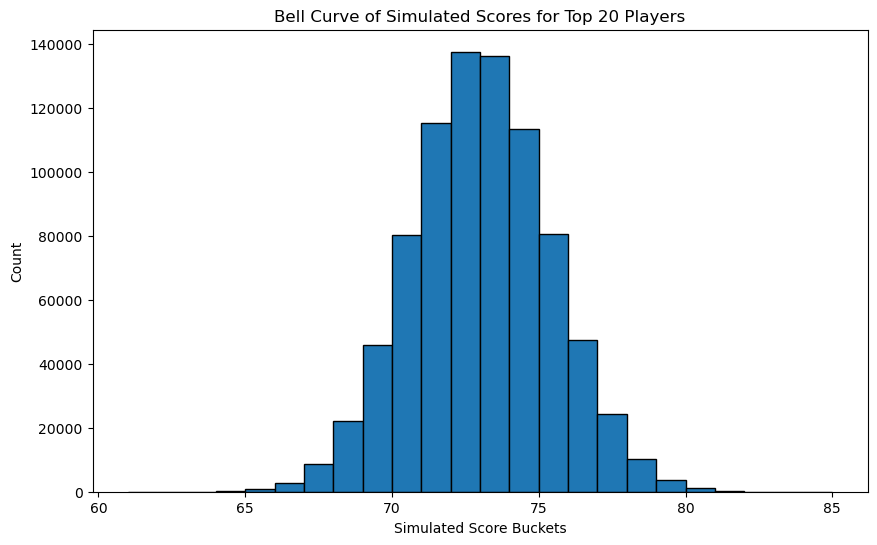

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define predictor columns (strokes gained metrics)
predictor_cols = ['Putt', 'Arg', 'App', 'OTT', 'BS', 'T2G', 'Total']

# 1. Train the model using historical data from complete_data
#    (only rows with a non-null masters_avg_score)
train_df = complete_data[complete_data['masters_avg_score'].notnull()].dropna(subset=predictor_cols + ['masters_avg_score'])
X_train = train_df[predictor_cols]
y_train = train_df['masters_avg_score']

model = LinearRegression()
model.fit(X_train, y_train)

# Calculate RMSE to model variability
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

# Feature importance (absolute coefficient values)
coef = pd.Series(model.coef_, index=predictor_cols)
coef_sorted = coef.abs().sort_values(ascending=False)
print("Feature Importances (Ranked):")
print(coef_sorted)

# 2. Predict 2025 scores using complete_data filtered for players in this year's Masters
#    Now filtering for both in_2025_masters == True and year == 2025
field_2025 = complete_data[(complete_data['in_2025_masters'] == True) & (complete_data['year'] == 2025)].copy().reset_index(drop=True)
# Remove duplicate players if any
field_2025 = field_2025.drop_duplicates(subset=['Player'])
# Fill missing predictor values with training data averages
for col in predictor_cols:
    field_2025[col] = field_2025[col].fillna(train_df[col].mean())
    
X_2025 = field_2025[predictor_cols]
predicted_scores = model.predict(X_2025)
field_2025['masters_avg_score'] = predicted_scores
masters_field_25 = field_2025

print("\nPredicted 2025 Masters Field (first 5 rows):")
print(masters_field_25.head())

# 3. Run 10000 Monte Carlo simulations for tournament outcomes
num_simulations = 10000
simulations = []

for sim in range(num_simulations):
    # Simulate scores by adding noise (RMSE as std deviation) to the predicted scores
    sim_scores = model.predict(X_2025) + np.random.normal(0, rmse, size=len(X_2025))
    # Lower score is better in golf; rank accordingly in each simulation
    sim_ranks = pd.Series(sim_scores).rank(method='min').astype(int)
    sim_df = pd.DataFrame({
        'simulation': sim + 1,
        'Player': field_2025['Player'],
        'simulated_score': sim_scores,
        'rank': sim_ranks
    })
    simulations.append(sim_df)

simulated_augusta = pd.concat(simulations, ignore_index=True)
print("\nSimulated Augusta Outcomes (first 5 rows):")
print(simulated_augusta.head())

# 4. Summarize simulation stats for each player
simulation_summary = simulated_augusta.groupby('Player').agg(
    min_simulated_score=('simulated_score', 'min'),
    max_simulated_score=('simulated_score', 'max'),
    win_count=('rank', lambda x: (x == 1).sum()),
    top6_count=('rank', lambda x: (x <= 6).sum())
).reset_index()

simulation_summary['win_percentage'] = simulation_summary['win_count'] / num_simulations * 100
simulation_summary['top6_percentage'] = simulation_summary['top6_count'] / num_simulations * 100

# 5. Merge simulation summary with the predicted 2025 scores
#    Also include the additional columns: Odds, Win Probability (%), EW Top 6 Probability (%), in_2025_masters
top_players = masters_field_25[['Player', 'masters_avg_score', 'Odds', 'Win Probability (%)', 'EW Top 6 Probability (%)', 'in_2025_masters']].merge(simulation_summary, on='Player', how='left')

# Sort players by win_count (or another metric) and select the top 20
top20 = top_players.sort_values(by='win_count', ascending=False)
print("\nTop 20 Predicted Players for 2025 Masters with Simulation Stats:")
print(top20[['Player', 'masters_avg_score', 'Odds', 'Win Probability (%)', 'EW Top 6 Probability (%)', 'in_2025_masters',
             'min_simulated_score', 'max_simulated_score', 'win_count', 'win_percentage', 'top6_count', 'top6_percentage']])

# 6. Create a histogram (bell curve) for the top 20 players
top20_players = top20['Player']
top20_simulated = simulated_augusta[simulated_augusta['Player'].isin(top20_players)]

# Define bins for the histogram with a width of 1
min_score = np.floor(top20_simulated['simulated_score'].min())
max_score = np.ceil(top20_simulated['simulated_score'].max())
bins = np.arange(min_score, max_score + 1, 1)

plt.figure(figsize=(10,6))
plt.hist(top20_simulated['simulated_score'], bins=bins, edgecolor='black')
plt.title('Bell Curve of Simulated Scores for Top 20 Players')
plt.xlabel('Simulated Score Buckets')
plt.ylabel('Count')
plt.show()


In [371]:
top20.head(10)

,Player,masters_avg_score,Odds,Win Probability (%),EW Top 6 Probability (%),in_2025_masters,min_simulated_score,max_simulated_score,win_count,top6_count,win_percentage,top6_percentage
0,Collin Morikawa,70.209239,12/1,7.69,29.41,True,62.847675,77.824789,1060,3800,10.60,38.00
1,Rory Mcilroy,70.784153,6/1,14.29,45.45,True,63.953537,78.382623,664,2846,6.64,28.46
2,Scottie Scheffler,71.019327,4/1,20.00,55.56,True,64.120641,78.330267,526,2441,5.26,24.41
5,Justin Thomas,71.213546,20/1,4.76,20.00,True,63.819008,78.027171,426,2140,4.26,21.40
7,Sepp Straka,71.233164,60/1,1.64,7.69,True,64.125705,78.938033,425,2117,4.25,21.17
18,Jason Day,71.295419,66/1,1.49,7.04,True,62.993952,78.896497,382,2053,3.82,20.53
10,J.J. Spaun,71.357329,150/1,0.66,3.23,True,64.404940,78.837406,374,1937,3.74,19.37
4,Russell Henley,71.368360,40/1,2.44,11.11,True,61.637579,78.322784,354,1910,3.54,19.10
3,Tommy Fleetwood,71.431788,28/1,3.45,15.15,True,63.373483,78.641035,353,1809,3.53,18.09
72,Jon Rahm,71.486294,16/1,5.88,23.81,True,64.413424,79.228371,349,1827,3.49,18.27


## tidy the prediction and output

In [397]:
# Create a new DataFrame "prediction" from top20
prediction = top20.copy()

# 1. Drop unwanted columns:
prediction = prediction.drop(columns=['in_2025_masters', 'min_simulated_score', 'max_simulated_score',
                                        'simulated_win_count', 'simulated_top6_count'], errors='ignore')

# 2. Rename columns:
prediction = prediction.rename(columns={
    'Win Probability (%)': 'odds_Win Probability (%)',
    'EW Top 6 Probability (%)': 'odds_EW Top 6 Probability (%)',
    'win_percentage': 'simulated_win_percentage',
    'top6_percentage': 'simulated_top6_percentage'
})

# 3. Add "Odds_rank" column (rank by odds_Win Probability (%) descending)
prediction['Odds_rank'] = prediction['odds_Win Probability (%)'].rank(method='min', ascending=False).astype(int)
prediction['prediction rank'] = prediction['simulated_win_percentage'].rank(method='min', ascending=False).astype(int)


# 4. Create predictionVodds columns:
prediction['predictionVodds_win'] = prediction['simulated_win_percentage'] - prediction['odds_Win Probability (%)']
prediction['predictionVodds_top6'] = prediction['simulated_top6_percentage'] - prediction['odds_EW Top 6 Probability (%)']

# 5. Create a "priced" column: 'over' if predictionVodds_win is positive, 'under' if negative (or zero)
prediction['priced'] = np.where(prediction['predictionVodds_win'] > 0, 'under', 'over')

# 6. Sort the table by the absolute value of predictionVodds_win descending
prediction['abs_predictionVodds_win'] = prediction['predictionVodds_win'].abs()
prediction = prediction.sort_values(by='abs_predictionVodds_win', ascending=False)
prediction = prediction.drop(columns=['abs_predictionVodds_win'])

# 7. Reorder the columns so that:
#    'Player' comes first, then 'predictionVodds_win', 'predictionVodds_top6', 'priced', then the rest.
ordered_cols = ['Player', 'predictionVodds_win', 'predictionVodds_top6', 'priced']
remaining_cols = [col for col in prediction.columns if col not in ordered_cols]
new_order = ordered_cols + remaining_cols
prediction = prediction[new_order]

print("Prediction DataFrame:")
print(prediction)


Prediction DataFrame:
               Player  predictionVodds_win  predictionVodds_top6 priced  \
2   Scottie Scheffler               -14.74                -31.15   over   
1        Rory Mcilroy                -7.65                -16.99   over   
74  Bryson Dechambeau                -4.48                -15.74   over   
53  Xander Schauffele                -4.36                -15.75   over   
23       Ludvig Aberg                -3.96                -11.50   over   
..                ...                  ...                   ...    ...   
26    Taylor Pendrith                -0.05                  1.71   over   
57         Chris Kirk                -0.05                  1.26   over   
37         Adam Scott                -0.04                  1.18   over   
69      Rafael Campos                -0.04                 -0.22   over   
58    Jhonattan Vegas                -0.03                  1.25   over   

    masters_avg_score    Odds  odds_Win Probability (%)  \
2           71.019

In [399]:
prediction.head(20)

,Player,predictionVodds_win,predictionVodds_top6,priced,masters_avg_score,Odds,odds_Win Probability (%),odds_EW Top 6 Probability (%),win_count,top6_count,simulated_win_percentage,simulated_top6_percentage,Odds_rank,prediction rank
2,Scottie Scheffler,-14.74,-31.15,over,71.019327,4/1,20.00,55.56,526,2441,5.26,24.41,1,3
1,Rory Mcilroy,-7.65,-16.99,over,70.784153,6/1,14.29,45.45,664,2846,6.64,28.46,2,2
74,Bryson Dechambeau,-4.48,-15.74,over,72.682757,18/1,5.26,21.74,78,600,0.78,6.00,6,34
53,Xander Schauffele,-4.36,-15.75,over,73.062259,20/1,4.76,20.00,40,425,0.40,4.25,7,47
23,Ludvig Aberg,-3.96,-11.50,over,71.925892,16/1,5.88,23.81,192,1231,1.92,12.31,4,17
10,J.J. Spaun,3.08,16.14,under,71.357329,150/1,0.66,3.23,374,1937,3.74,19.37,47,7
0,Collin Morikawa,2.91,8.59,under,70.209239,12/1,7.69,29.41,1060,3800,10.60,38.00,3,1
35,Viktor Hovland,-2.74,-10.07,over,73.087893,30/1,3.23,14.29,49,422,0.49,4.22,14,43
29,Jordan Spieth,-2.71,-8.97,over,72.781086,30/1,3.23,14.29,52,532,0.52,5.32,14,42
7,Sepp Straka,2.61,13.48,under,71.233164,60/1,1.64,7.69,425,2117,4.25,21.17,24,5


In [387]:
#only list players who are underpriced by bookies (EV in our favour) and bookies have in the top 30 chance of winning
prediction[(prediction['priced'] == 'under') & (prediction['Odds_rank'] < 30)]


,Player,predictionVodds_win,predictionVodds_top6,priced,masters_avg_score,Odds,odds_Win Probability (%),odds_EW Top 6 Probability (%),win_count,top6_count,simulated_win_percentage,simulated_top6_percentage,Odds_rank
0,Collin Morikawa,2.91,8.59,under,70.209239,12/1,7.69,29.41,1060,3800,10.60,38.00,3
7,Sepp Straka,2.61,13.48,under,71.233164,60/1,1.64,7.69,425,2117,4.25,21.17,24
18,Jason Day,2.33,13.49,under,71.295419,66/1,1.49,7.04,382,2053,3.82,20.53,26
4,Russell Henley,1.10,7.99,under,71.368360,40/1,2.44,11.11,354,1910,3.54,19.10,18
6,Shane Lowry,0.39,5.46,under,71.418491,33/1,2.94,13.16,333,1862,3.33,18.62,16
12,Robert Macintyre,0.08,3.10,under,71.899321,50/1,1.96,9.09,204,1219,2.04,12.19,20
3,Tommy Fleetwood,0.08,2.94,under,71.431788,28/1,3.45,15.15,353,1809,3.53,18.09,11


In [401]:
prediction.to_csv("~/Desktop/prediction.csv", index=False)
coef_sorted.to_csv("~/Desktop/coef_sorted.csv", index=False)
